# Available years per attribute/city

In [1]:
import sqlite3
import pandas as pd
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy 
city_cube  = 'C_urban_cube_sh.sqlite'

C:\Users\bbel\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:112: UserWarning: The Shapely GEOS version (3.10.1-CAPI-1.16.0) is incompatible with the GEOS version PyGEOS was compiled with (3.10.3-CAPI-1.16.1). Conversions between both will be slow.
  warnings.warn(


In [2]:
# get Eurostat number of population data
con = sqlite3.connect(city_cube)
# read full table
population_all = pd.read_sql_query("SELECT * FROM c_urban_cube_eurostat", con)

## Available data per year

<BarContainer object of 31 artists>

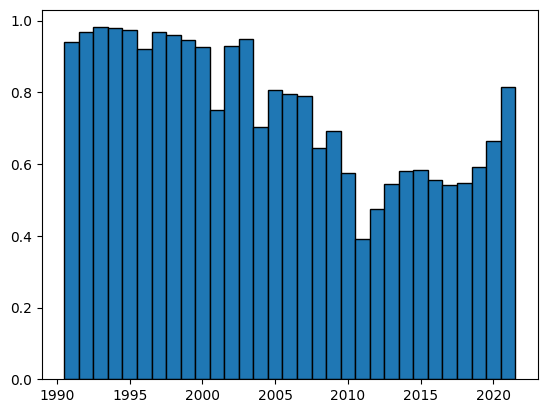

In [3]:
l1 = []
j = 0
for i in population_all.columns:
    if(j>2):
        l1.append(population_all[i].isna().sum().sum()/len(population_all))
    j = j + 1
a = range(1991, 2022)
plt.bar(a, l1, align='center', width=1, edgecolor='black')

## Create data of available years

In [4]:
%%time
d = {}
d["city"] = population_all.urau_code.unique()
for i in population_all.indic_code.unique():
    n = []
    for j in population_all.urau_code.unique():
        sub = population_all[population_all['urau_code'] == j]
        if (len(sub[sub['indic_code'] == i]) == 0):
            n.append(0)
        else:
            n.append(len(sub.columns) - sub[sub['indic_code'] == i].isna().sum().sum() - 3)
    d[i] = n
df = pd.DataFrame(data=d)
df.head()

CPU times: total: 4min 52s
Wall time: 4min 55s


,city,EN1002V,EN1003V,EN1004V,EN1005V,EN2002V,EN2003V,EN2005V,EN2025V,EN2026V,...,TT1008V,TT1010V,TT1012V,TT1079V,TT1019V,TT1020V,TT1060V,TT1064V,TT1065V,TT1080V
0,AT001C,1,2,2,2,22,23,12,22,23,...,2,0,0,2,0,0,8,1,1,6
1,AT002C,2,3,3,3,22,23,13,22,23,...,3,1,1,2,0,0,8,0,0,6
2,AT003C,2,3,3,3,23,23,14,23,23,...,2,0,0,2,0,0,8,0,0,3
3,AT004C,2,3,3,3,23,23,12,23,23,...,0,0,0,2,0,0,8,0,0,5
4,AT005C,2,3,3,3,21,6,0,21,6,...,0,0,0,2,0,0,8,0,0,5


In [10]:
df['SUM'] = df.sum(axis=1, numeric_only=True)
df.to_csv('Available_Data_Year.csv', index=False)

## Plot available data for each city/attribute

In [9]:
x = range(len(df.iloc[0])-1)
for i in range(len(df)):
    row = df.iloc[i]
    row = pd.to_numeric(row, errors='coerce')
    row = row.drop('SUM')
    plt.bar(x, row)
    plt.xlabel("Atributes")
    plt.ylabel("Number of avaulable years")
    plt.title(df.iloc[i]['city'])
    plt.axhline(y = 31, color = 'r', linestyle = '-')
    plt.savefig("Plots/CityAvailability" + df.iloc[i]['city'] + ".png")
    plt.clf()

<Figure size 640x480 with 0 Axes>